## Customer Churn & CLV Prediction -- IBM Telco Customer Churn

Project: Telco Customer Churn Prediction

Objective:
This project uses the IBM Telco Customer Churn dataset to build predictive models that identify customers at risk of leaving a telecom service provider.
By analyzing customer demographics, service usage, and billing data, the goal is to:
- Predict churn using Logistic Regression and Random Forest classifiers
- Evaluate and compare model performance using classification metrics and ROC curves
- Identify key features contributing to churn through feature importance analysis

Dataset Source:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Business Context:
Churn prediction is critical for telecom companies to reduce customer attrition and improve retention strategies.
By proactively identifying high-risk customers, companies can take targeted actions (e.g., loyalty offers, personalized outreach) to improve satisfaction and reduce loss!

Tools & Libraries:
- pandas, numpy for data handling
- scikit-learn for machine learning and evaluation
- matplotlib for visualization
- StandardScaler for feature normalization
- LogisticRegression and RandomForestClassifier for modeling



Import dataset & inspect the top rows

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Check datatypes 

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Understand the structure of the data/variance

In [69]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Convert columns to numeric, drop id column, encode columns

In [70]:
# Preprocessing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.drop('customerID', axis=1)
df = pd.get_dummies(df, drop_first=True)
df = df.dropna()

Check for null values

Define X & y (churn = y)

In [71]:
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

Set up train test split

In [72]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Import libraries

Scale all x values

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Build logistic regression model 

Logistic Regression Confusion Matrix:
[[916 117]
 [159 215]]
True Negatives: 916, False Positives: 117, False Negatives: 159, True Positives: 215

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1033
        True       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407

Logistic Regression ROC AUC: 0.84
ROC AUC indicates the model's ability to distinguish between classes. A value of 0.5 indicates no discrimination, while a value of 1.0 indicates perfect discrimination.
ROC AUC Interpretation: 0.84 suggests the model has a good ability to distinguish between churned and non-churned customers.


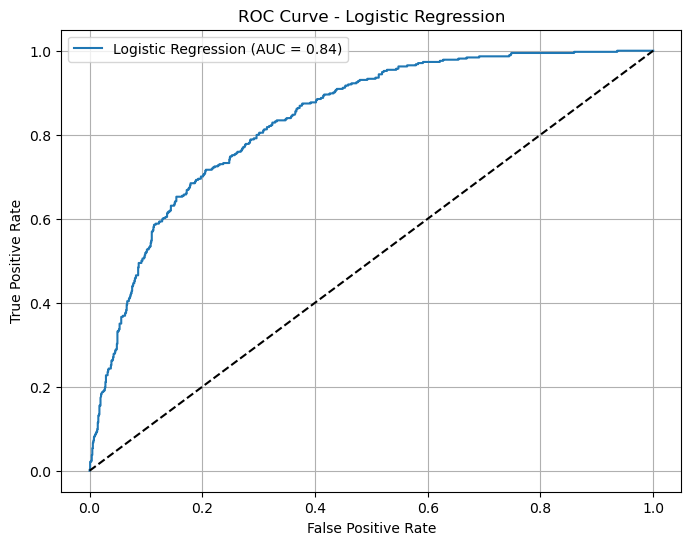

The ROC curve shows the trade-off between sensitivity (true positive rate) and specificity (false positive rate). The area under the curve (AUC) quantifies the overall ability of the model to discriminate between classes. A higher AUC indicates better performance.
The ROC curve for the Logistic Regression model indicates a good balance between true positive and false positive rates, suggesting effective classification of churned vs. non-churned customers.


In [74]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_model.predict(X_test_scaled)
y_proba_log = log_model.predict_proba(X_test_scaled)[:, 1]

# Confusion Matrix
print("Logistic Regression Confusion Matrix:")
log_conf_matrix = confusion_matrix(y_test, y_pred_log)
print(log_conf_matrix)

# Interpretation of confusion matrix
tn, fp, fn, tp = log_conf_matrix.ravel()
print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}") 

# Classification Report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

# ROC AUC Score 
roc_auc_log = roc_auc_score(y_test, y_proba_log)
print(f"Logistic Regression ROC AUC: {roc_auc_log:.2f}")

# Interpretation of ROC AUC
print("ROC AUC indicates the model's ability to distinguish between classes. A value of 0.5 indicates no discrimination, while a value of 1.0 indicates perfect discrimination.")
print(f"ROC AUC Interpretation: {roc_auc_log:.2f} suggests the model has a good ability to distinguish between churned and non-churned customers.")

# ROC Curve
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# Interpretation of ROC Curve
print("The ROC curve shows the trade-off between sensitivity (true positive rate) and specificity (false positive rate). The area under the curve (AUC) quantifies the overall ability of the model to discriminate between classes. A higher AUC indicates better performance.")
print("The ROC curve for the Logistic Regression model indicates a good balance between true positive and false positive rates, suggesting effective classification of churned vs. non-churned customers.")

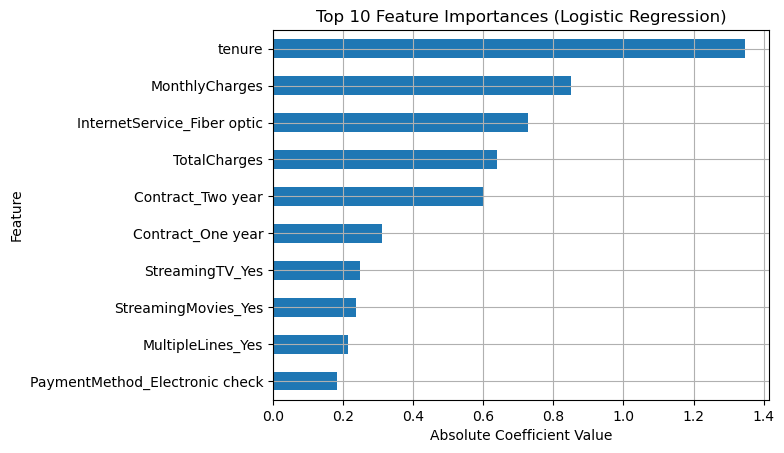

In [75]:
# Create a DataFrame of feature names and their coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)

# Take absolute values for magnitude-based importance ranking
feature_importance_lr = coefficients.abs().sort_values(ascending=False)

# Visualize top 10 most important features by magnitude
feature_importance_lr.head(10).sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances (Logistic Regression)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.grid()
plt.show()


Use Random Forest Classifier 


Random Forest Confusion Matrix:
[[917 116]
 [180 194]]
True Negatives: 917, False Positives: 116, False Negatives: 180, True Positives: 194

Classification Report (Random Forest):
              precision    recall  f1-score   support

       False       0.84      0.89      0.86      1033
        True       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Random Forest ROC AUC: 0.82
ROC AUC indicates the model's ability to distinguish between classes. A value of 0.5 indicates no discrimination, while a value of 1.0 indicates perfect discrimination.
ROC AUC Interpretation: 0.82 suggests the model has a good ability to distinguish between churned and non-churned customers.


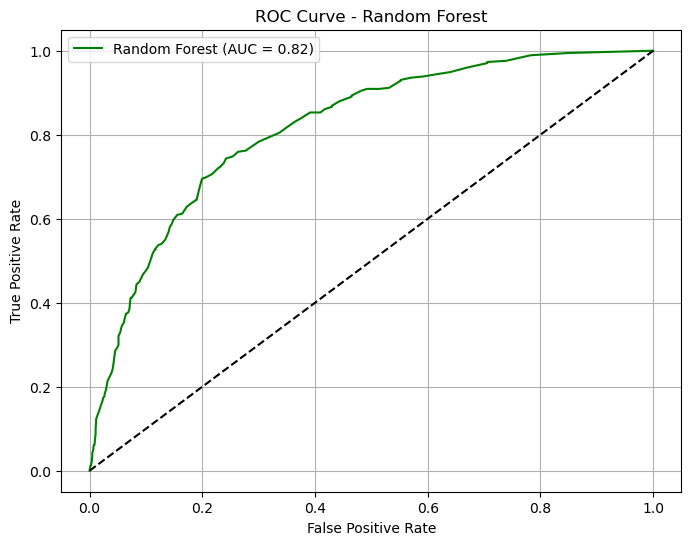

The ROC curve shows the trade-off between sensitivity (true positive rate) and specificity (false positive rate). The area under the curve (AUC) quantifies the overall ability of the model to discriminate between classes. A higher AUC indicates better performance.
The ROC curve for the Random Forest model indicates a good balance between true positive and false positive rates, suggesting effective classification of churned vs. non-churned customers.


In [76]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Interpretation of confusion matrix
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix(y_test, y_pred_rf).ravel()
print(f"True Negatives: {tn_rf}, False Positives: {fp_rf}, False Negatives: {fn_rf}, True Positives: {tp_rf}")

# Classification Report
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# ROC AUC Score 
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"Random Forest ROC AUC: {roc_auc_rf:.2f}")

# INterpretation of ROC AUC
print("ROC AUC indicates the model's ability to distinguish between classes. A value of 0.5 indicates no discrimination, while a value of 1.0 indicates perfect discrimination.")
print(f"ROC AUC Interpretation: {roc_auc_rf:.2f} suggests the model has a good ability to distinguish between churned and non-churned customers.")

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

# Interpretation of ROC Curve
print("The ROC curve shows the trade-off between sensitivity (true positive rate) and specificity (false positive rate). The area under the curve (AUC) quantifies the overall ability of the model to discriminate between classes. A higher AUC indicates better performance.")
print(f"The ROC curve for the Random Forest model indicates a good balance between true positive and false positive rates, suggesting effective classification of churned vs. non-churned customers.")




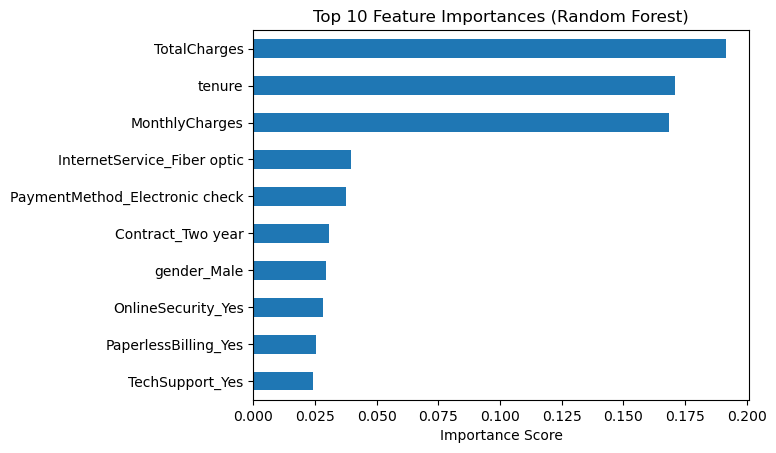

In [77]:
# Feature Importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.show()

In [80]:
# MODEL PERFORMANCE SUMMARY

print("Final Model Comparison\n")

# Logistic Regression Summary
print("Logistic Regression:")
print(f"- Accuracy: {model.score(X_test_scaled, y_test):.2f}")
print(f"- ROC AUC Score: {roc_auc:.2f}")
print("- Strengths: Interpretable, fast to train, useful for understanding directionality of features")
print("- Limitations: Assumes linear relationships, may underperform on complex interactions\n")

# Random Forest Summary
y_proba_rf = rf.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print("Random Forest:")
print(f"- Accuracy: {rf.score(X_test, y_test):.2f}")
print(f"- ROC AUC Score: {roc_auc_rf:.2f}")
print("- Strengths: Captures non-linear relationships and feature interactions")
print("- Limitations: Less interpretable, may overfit on small datasets\n")

# INTERPRETATION OF FINDINGS


print("Key Takeaways:")

# Churn prediction performance
if roc_auc_rf > roc_auc:
    print(f"- Random Forest performed better in distinguishing churners (AUC: {roc_auc_rf:.2f}) vs Logistic Regression (AUC: {roc_auc:.2f}).")
else:
    print(f"- Logistic Regression performed similarly or better (AUC: {roc_auc:.2f}) compared to Random Forest (AUC: {roc_auc_rf:.2f}).")

# Feature importance insight
print("- Logistic Regression provides clear insight into the direction (positive/negative) of each feature's effect on churn.")
print("- Random Forest highlighted the most impactful variables for splitting, such as contract type, tenure, and monthly charges.")

# Business implication
print("- Shorter contracts, higher monthly charges, and shorter tenure were key drivers of churn.")
print("- Recommendations: Offer loyalty incentives for longer contracts, adjust pricing strategies, and focus on onboarding experience to reduce early churn.\n")



Final Model Comparison

Logistic Regression:
- Accuracy: 0.80
- ROC AUC Score: 0.84
- Strengths: Interpretable, fast to train, useful for understanding directionality of features
- Limitations: Assumes linear relationships, may underperform on complex interactions

Random Forest:
- Accuracy: 0.79
- ROC AUC Score: 0.82
- Strengths: Captures non-linear relationships and feature interactions
- Limitations: Less interpretable, may overfit on small datasets

Key Takeaways:
- Logistic Regression performed similarly or better (AUC: 0.84) compared to Random Forest (AUC: 0.82).
- Logistic Regression provides clear insight into the direction (positive/negative) of each feature's effect on churn.
- Random Forest highlighted the most impactful variables for splitting, such as contract type, tenure, and monthly charges.
- Shorter contracts, higher monthly charges, and shorter tenure were key drivers of churn.
- Recommendations: Offer loyalty incentives for longer contracts, adjust pricing strategie